In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Advertising.csv")
print(df)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [5]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [6]:
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(X_poly)

[[ 230.1    37.8    69.2  ... 1428.84 2615.76 4788.64]
 [  44.5    39.3    45.1  ... 1544.49 1772.43 2034.01]
 [  17.2    45.9    69.3  ... 2106.81 3180.87 4802.49]
 ...
 [ 177.      9.3     6.4  ...   86.49   59.52   40.96]
 [ 283.6    42.     66.2  ... 1764.   2780.4  4382.44]
 [ 232.1     8.6     8.7  ...   73.96   74.82   75.69]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

[[ 116.      7.7    23.1  ...   59.29  177.87  533.61]
 [ 177.      9.3     6.4  ...   86.49   59.52   40.96]
 [  43.1    26.7    35.1  ...  712.89  937.17 1232.01]
 ...
 [ 217.7    33.5    59.   ... 1122.25 1976.5  3481.  ]
 [ 165.6    10.     17.6  ...  100.    176.    309.76]
 [ 280.2    10.1    21.4  ...  102.01  216.14  457.96]]
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64


In [10]:
PR = LinearRegression()
PR.fit(X_train, y_train)

LinearRegression()

In [11]:
TV = float(input("Enter TV advertising spend ($): "))
Radio = float(input("Enter Radio advertising spend ($): "))
Newspaper = float(input("Enter Newspaper advertising spend ($): "))

new_data = np.array([[TV, Radio, Newspaper]])
new_data_poly = poly.transform(new_data)
predicted_sales = PR.predict(new_data_poly)[0]

print(f"\nPredicted Sales: {predicted_sales:.2f} units")

Enter TV advertising spend ($): 10
Enter Radio advertising spend ($): 20
Enter Newspaper advertising spend ($): 32

Predicted Sales: 6.50 units


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

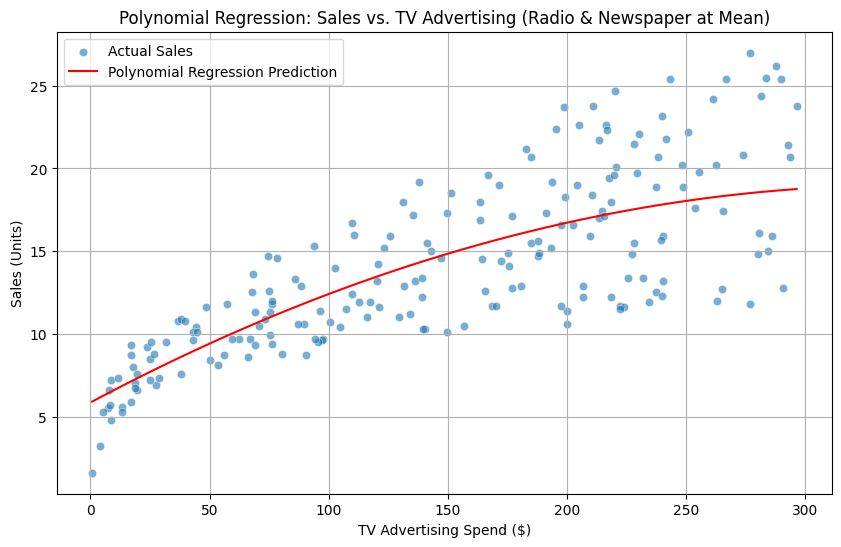

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TV'], y=df['Sales'], label='Actual Sales', alpha=0.6)
sns.lineplot(x=tv_range.flatten(), y=predicted_sales_for_plot, color='red', label='Polynomial Regression Prediction')

plt.title('Polynomial Regression: Sales vs. TV Advertising (Radio & Newspaper at Mean)')
plt.xlabel('TV Advertising Spend ($)')
plt.ylabel('Sales (Units)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [18]:
# Make predictions on the test set
y_pred = PR.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.9869
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.41
Root Mean Squared Error (RMSE): 0.64


In [ ]:
from google.colab import files
import pickle
with open('advertising_poly_model.pkl', 'wb') as f:
    pickle.dump((PR, poly), f)

# Download the model
files.download("advertising_poly_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
